While analysing the dataset, we encountered some instances where one traffic sign is annotated with multiple bounding boxes. Having multiple ground truth boxes for one sign confuses the model while training, making it harder to learn the prediction for such traffic sign

Thus, we decided to remove ground truth boxes with IoU >= 0.5

In [ ]:
import pandas as pd

In [ ]:
df_validate = pd.read_csv('/content/drive/MyDrive/DL_Project/Data/validate_40.csv')
df_train = pd.read_csv('/content/drive/MyDrive/DL_Project/Data/train_40.csv')

In [ ]:
df_validate['area'] = (df_validate['xmax'] - df_validate['xmin'])*(df_validate['ymax'] - df_validate['ymin'])
df_validate.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,area
0,21.png,1622,626,cam_re,822,314,844,336,484
1,21.png,1622,626,cam_dung_va_do,697,321,705,327,48
2,22.png,1622,626,cam_dung_va_do,1021,140,1161,270,18200
3,47.png,1622,626,cam_con_lai,906,316,932,341,650
4,55.png,1622,626,cam_re,1370,225,1458,316,8008


In [ ]:
def IoU(box1, box2):
  '''
  Calculate IoU between 2 boxes
  box1: list of xmin, ymin, xmax, ymax for box 1
  box2: list of xmin, ymin, xmax, ymax for box 2
  '''
  x11, y11, x12, y12, area1, _ = box1
  x21, y21, x22, y22, area2, _ = box2

  topleft_x = max(x11,x21)
  topleft_y = max(y11,y21)

  bottomright_x = min(x12,x22)
  bottomright_y = min(y12,y22)

  intersection = max(bottomright_x - topleft_x, 0) * max(bottomright_y - topleft_y, 0)
  total_area = area1 + area2

  union = total_area - intersection
  iou = intersection / union

  return iou

def suppress_box(df):
  images = df['filename'].unique()
  for image in images:
    bboxes = df[df['filename'] == image][['xmin', 'ymin', 'xmax', 'ymax', 'area', 'class']].values.tolist()
    for i, box in enumerate(bboxes[:-1]):
      b_class = box[-1]
      for j, remaining_box in enumerate(bboxes[i+1:]):
        iou = IoU(box, remaining_box)
        xmin, ymin, xmax, ymax, area, rclass = remaining_box
        if (iou > 0.70) & (b_class==rclass):
          index = df[(df['xmin'] == xmin) & (df['xmax'] == xmax) & (df['ymin'] == ymin) & (df['ymax'] == ymax)].index
          df.drop(index, inplace=True)
  return

In [ ]:
len(df_validate)

1208

In [ ]:
suppress_box(df_validate)

In [ ]:
len(df_validate)

948

In [ ]:
df_validate.to_csv('/content/drive/MyDrive/DL_Project/Data/validate_40.csv', index=False)

In [ ]:
df_train['area'] = (df_train['xmax'] - df_train['xmin'])*(df_train['ymax'] - df_train['ymin'])
df_train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,area
0,3.png,1622,626,cam_dung_va_do,880,333,899,351,342
1,5.png,1622,626,cam_re,1069,355,1152,438,6889
2,5.png,1622,626,cam_dung_va_do,768,480,777,487,63
3,6.png,1622,626,nguy_hiem,781,337,798,352,255
4,16.png,1622,626,cam_dung_va_do,733,352,740,360,56


In [ ]:
len(df_train)

9023

In [ ]:
suppress_box(df_train)
len(df_train)

7464

In [ ]:
df_train.to_csv('/content/drive/MyDrive/DL_Project/Data/train_40.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.patches as patches

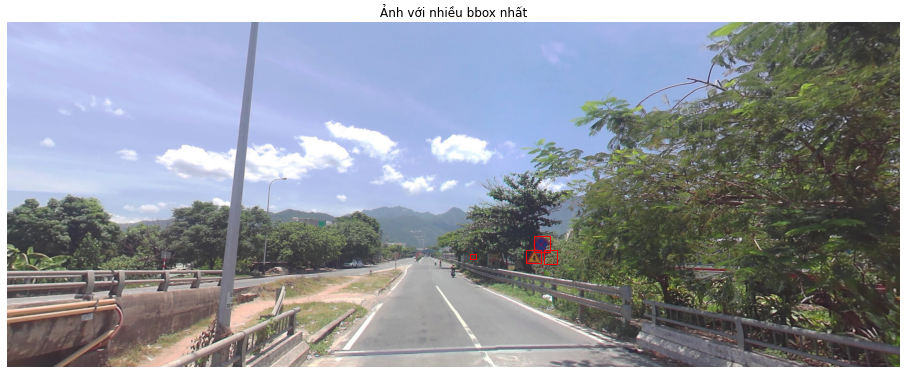

In [ ]:
def get_all_bboxes(df, filename):
    image_bboxes = df[df.filename == filename]
    
    bboxes = []
    for _,row in image_bboxes.iterrows():
        bboxes.append((row.xmin, row.ymin, row.xmax, row.ymax))
        
    return bboxes

train_path = '/content/drive/MyDrive/DL_Project/Data/Train_Set'
fig, axs = plt.subplots(1,1, figsize=(16,8))
img_id = '8794.png'
img = cv2.imread(os.path.join(train_path, img_id))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axs.imshow(img)
            
bboxes = get_all_bboxes(df_validate, img_id)
for bbox in bboxes:
  rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2]-bbox[0],bbox[3]-bbox[1],linewidth=1,edgecolor='r',facecolor='none')
  axs.add_patch(rect)
axs.axis('off')
plt.title('Ảnh với nhiều bbox nhất')
plt.show()

In [ ]:
a = [1,2,3,4]

In [ ]:
a[:-1]

[1, 2, 3]